___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
X_train.shape # check the shape of the image

(60000, 28, 28)

In [6]:
y_train.shape # check the shape of the label

(60000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

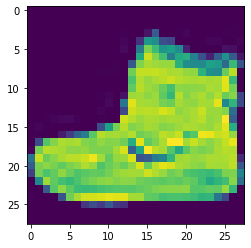

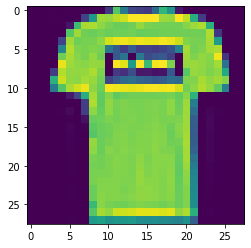

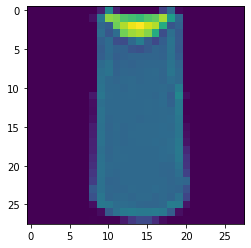

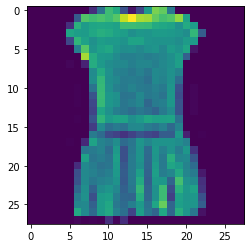

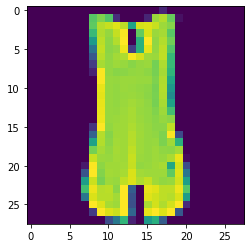

In [7]:
for i in range(5):                    
    plt.imshow(X_train[i])
    plt.show()

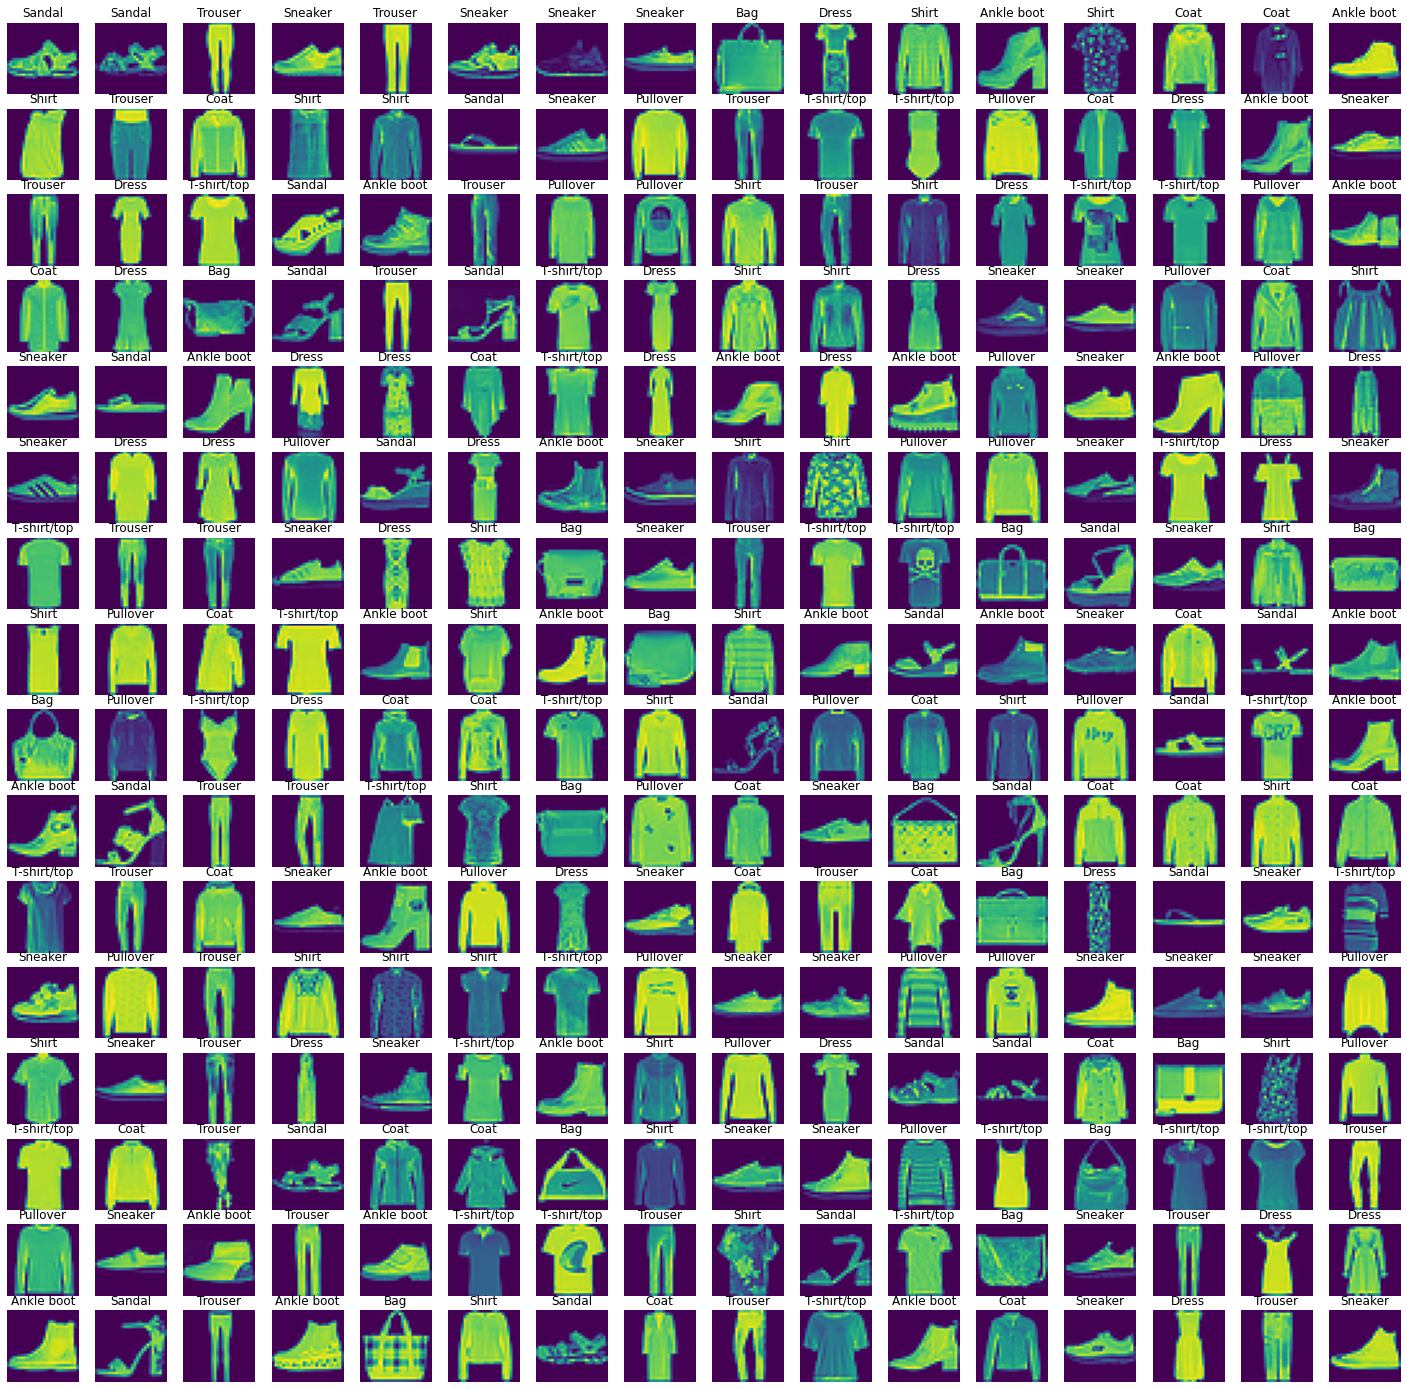

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

int(np.random.randint(low=0, high=60000, size=1))
X_train[int(np.random.randint(low=0, high=60000, size=1))]

plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index]) 

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
X_train[55].min()

0

In [10]:
X_train[55].max()

255

In [11]:
X_train = X_train / 255.0     # normalize the data
X_test = X_test / 255.0  

In [12]:
X_train[55].min()

0.0

In [13]:
X_train[55].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # reshape the data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train.shape, X_test.shape # check the shape of the image

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [19]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 256)               5225728   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [21]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.4228 - accuracy: 0.8517 - val_loss: 0.3149 - val_accuracy: 0.8871
Epoch 2/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2849 - accuracy: 0.8992 - val_loss: 0.2732 - val_accuracy: 0.9009
Epoch 3/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2359 - accuracy: 0.9143 - val_loss: 0.2555 - val_accuracy: 0.9097
Epoch 4/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.2000 - accuracy: 0.9264 - val_loss: 0.2660 - val_accuracy: 0.9096
Epoch 5/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.1736 - accuracy: 0.9346 - val_loss: 0.2561 - val_accuracy: 0.9150
Epoch 6/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1498 - accuracy: 0.9445 - val_loss: 0.2585 - val_accuracy: 0.9156
Epoch 7/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1306 - accuracy: 0.9520 - val_loss: 0.3042 -

**TASK 7: Plot values of metrics you used in your model.**

In [22]:
summary= pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.422770,0.851733,0.314851,0.8871
1,0.284859,0.899183,0.273248,0.9009
2,0.235891,0.914350,0.255463,0.9097
3,0.200012,0.926433,0.265967,0.9096
4,0.173566,0.934617,0.256104,0.9150


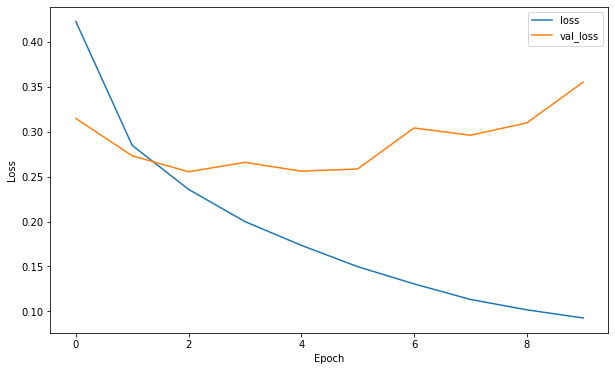

In [23]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

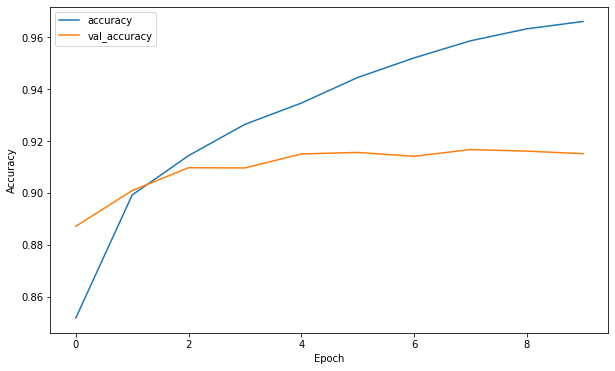

In [24]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

## Train the model using earlystop.

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [27]:
model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0855 - accuracy: 0.9695 - val_loss: 0.3485 - val_accuracy: 0.9162
Epoch 2/25
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0777 - accuracy: 0.9724 - val_loss: 0.3490 - val_accuracy: 0.9173
Epoch 3/25
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0676 - accuracy: 0.9751 - val_loss: 0.4178 - val_accuracy: 0.9164
Epoch 4/25
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0662 - accuracy: 0.9767 - val_loss: 0.4125 - val_accuracy: 0.9170
Epoch 5/25
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0608 - accuracy: 0.9782 - val_loss: 0.4166 - val_accuracy: 0.9153
Epoch 6/25
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0551 - accuracy: 0.9801 - val_loss: 0.4203 - val_accuracy: 0.9183


### Plot values of metrics you used in your model.

In [28]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.085529,0.969483,0.348462,0.9162
1,0.077652,0.972383,0.348984,0.9173
2,0.067644,0.975150,0.417845,0.9164
3,0.066177,0.976683,0.412462,0.9170
4,0.060811,0.978217,0.416622,0.9153


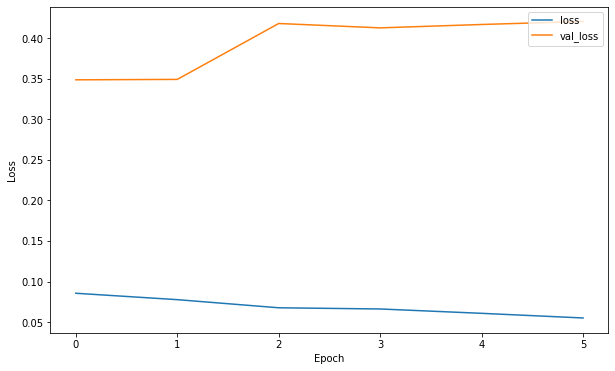

In [29]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

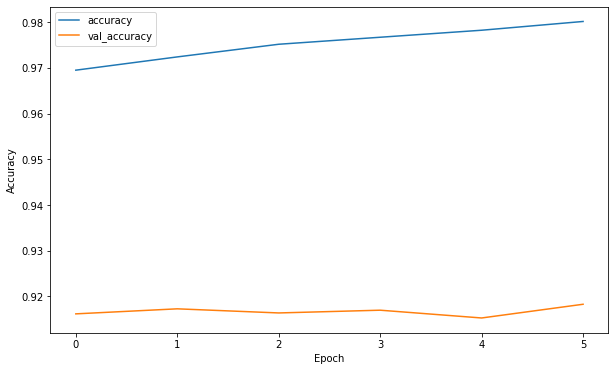

In [30]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.4203 - accuracy: 0.9183


[0.42034706473350525, 0.9182999730110168]

In [33]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [34]:
preds = model.predict(X_test)
predictions = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 10ms/step


In [35]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(preds,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[875   0  16  11   3   3  88   0   4   0]
 [  1 983   1   9   2   0   1   0   3   0]
 [ 20   0 885  10  45   0  38   0   2   0]
 [ 20   1   6 926  22   0  23   0   2   0]
 [  1   0  77  13 864   0  45   0   0   0]
 [  0   0   0   0   0 981   0  10   0   9]
 [110   0  63  26  46   0 745   0  10   0]
 [  0   0   0   0   0  10   0 968   0  22]
 [  1   0   1   4   2   2   2   2 986   0]
 [  0   0   0   0   0   5   1  24   0 970]]


In [36]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.89      0.86      1000
           3       0.93      0.93      0.93      1000
           4       0.88      0.86      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.74      0.77      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Prediction

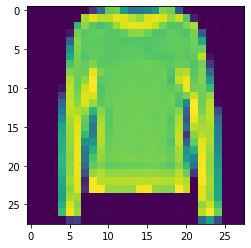

In [37]:
plt.imshow(X_test[99])

313/313 [==============================] - 3s 10ms/step


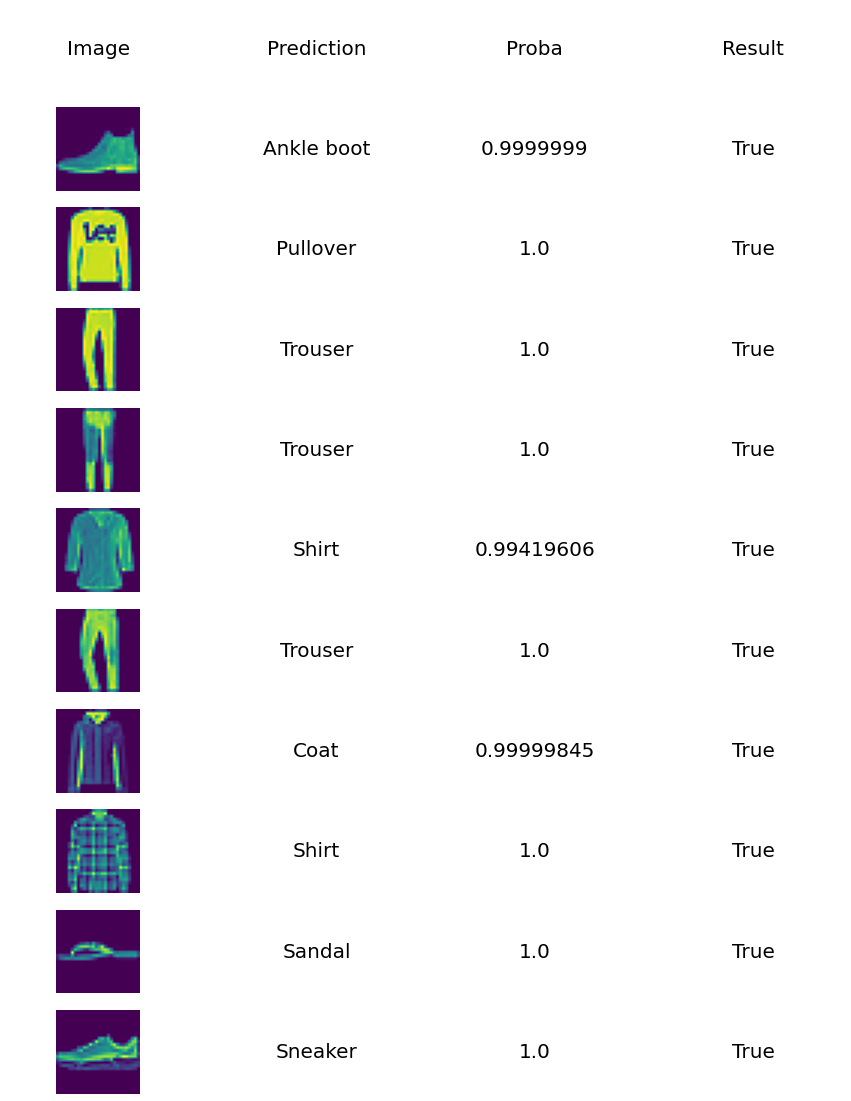

In [38]:
predictions = model.predict(X_test)

text_size = 20

plt.figure(figsize=(15,20))
plt.subplot(11, 4, 1)
plt.axis('off')
plt.text(0.5, 0.5, "Image", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 2)
plt.axis('off')
plt.text(0.5, 0.5, "Prediction", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 3)
plt.axis('off')
plt.text(0.5, 0.5, "Proba", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 4)
plt.axis('off')
plt.text(0.5, 0.5, "Result", size=text_size, ha='center', va='center')

for i in range(10):
    predicted = predictions[i].argmax()
    actual = y_test[i].argmax()
    
    plt.subplot(11, 4, i*4 + 5)
    plt.axis('off')
    plt.imshow(X_test[i], cmap=None)
    
    plt.subplot(11, 4, i*4 + 6)
    plt.axis('off')
    plt.text(0.5, 0.5, classes[predicted], size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 7)
    plt.axis('off')
    plt.text(0.5, 0.5, str(predictions[i][predicted]), size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 8)
    plt.axis('off')
    plt.text(0.5, 0.5, str(actual == predicted), size=text_size, ha='center', va='center')
# show the figure
plt.show()

# End of Assignment

In [39]:
model.save("image_classification.h5")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___